In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D


In [13]:
df_train=pd.read_csv("/home/shruti/Downloads/simple-linear-regression/train.csv")
print(df_train)
df_test=pd.read_csv("/home/shruti/Downloads/simple-linear-regression/test.csv")
#print(df_test)

         x           y
0     24.0   21.549452
1     50.0   47.464463
2     15.0   17.218656
3     38.0   36.586398
4     87.0   87.288984
5     36.0   32.463875
6     12.0   10.780897
7     81.0   80.763399
8     25.0   24.612151
9      5.0    6.963319
10    16.0   11.237573
11    16.0   13.532902
12    24.0   24.603239
13    39.0   39.400500
14    54.0   48.437538
15    60.0   61.699003
16    26.0   26.928324
17    73.0   70.405206
18    29.0   29.340924
19    31.0   25.308952
20    68.0   69.029343
21    87.0   84.994847
22    58.0   57.043103
23    54.0   50.592199
24    84.0   83.027722
25    58.0   57.057527
26    49.0   47.958833
27    20.0   24.342264
28    90.0   94.684883
29    48.0   48.039707
..     ...         ...
670   84.0   82.889358
671   64.0   63.613650
672   12.0   11.296272
673   61.0   60.022749
674   75.0   72.603393
675   15.0   11.879646
676  100.0  100.701274
677   43.0   45.124208
678   13.0   14.811068
679   48.0   48.093680
680   45.0   42.291457
681   52.0 

In [41]:
# Train test split
X_train=np.array(df_train['x'].values)
y_train=np.array(df_train['y'].values)
X_test=np.array(df_test['x'].values)
y_test=np.array(df_test['y'].values)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(700,)
(700,)
(300,)
(300,)


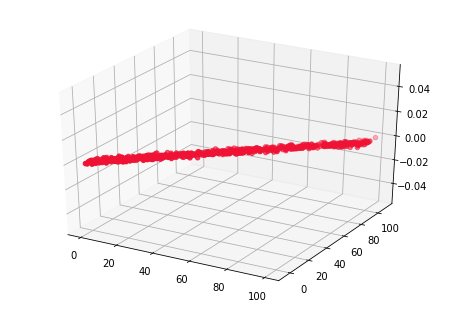

In [42]:
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train, y_train, color='#ef1234')
plt.show()


In [43]:
m = len(X_train)
x0 = np.ones(m)
X = np.array([x0, X_train]).T
# Initial Coefficients
B = np.array([0,0])
Y = np.array(y_train)
alpha = 0.0001

In [44]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J
inital_cost = cost_function(X,Y,B)
print(inital_cost)

nan


In [49]:
def gradient_descent(X,Y, B,alpha,iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X,Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [50]:
newB, cost_history = gradient_descent(X,Y,B,alpha,100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])


[nan nan]
nan


In [55]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))


nan
nan
